# multi classification

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')



Read Data

In [2]:
stroke_path = r"D:\BCAI_4\D_L\SEC\Sec_1\1- Neural Network\Task\stroke.csv"
try:
    df_stroke = pd.read_csv(stroke_path)
    print("The stroke.csv file has been uploaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found in the specified path : {stroke_path}")
    exit()

The stroke.csv file has been uploaded successfully.


PreProcessing


In [3]:
df_stroke = df_stroke.drop('id', axis=1, errors='ignore')
X = df_stroke.drop('stroke', axis=1)
y = df_stroke['stroke']

In [4]:

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [5]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [7]:

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Class SoftMax

In [8]:

y_train_cat = keras.utils.to_categorical(y_train, num_classes=2)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=2)

Build Model

In [9]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train_processed.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),

    layers.Dense(2, activation='softmax') 
])

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # دالة الخسارة المناسبة للتصنيف المتعدد
              metrics=['accuracy'])

In [11]:
history=model.fit(
    X_train_processed, y_train_cat,
    validation_data=(X_test_processed, y_test_cat),
    epochs=50,
    batch_size=32,
)

Epoch 1/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7536 - loss: 0.5083 - val_accuracy: 0.7995 - val_loss: 0.4301
Epoch 2/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8110 - loss: 0.4267 - val_accuracy: 0.8098 - val_loss: 0.3964
Epoch 3/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8208 - loss: 0.3945 - val_accuracy: 0.8350 - val_loss: 0.3720
Epoch 4/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8313 - loss: 0.3773 - val_accuracy: 0.8355 - val_loss: 0.3573
Epoch 5/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8435 - loss: 0.3608 - val_accuracy: 0.8432 - val_loss: 0.3523
Epoch 6/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8438 - loss: 0.3484 - val_accuracy: 0.8478 - val_loss: 0.3360
Epoch 7/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8502 - loss: 0.3355 - val_accuracy: 0.8689 - val_loss: 0.3196
Epoch 8/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8579 - loss: 0.3253 - val_accuracy: 0.

In [12]:
loss, accuracy = model.evaluate(X_test_processed, y_test_cat, verbose=0)
print(f"Accuracy on Test Data: {accuracy:.4f}")

Accuracy on Test Data: 0.9265


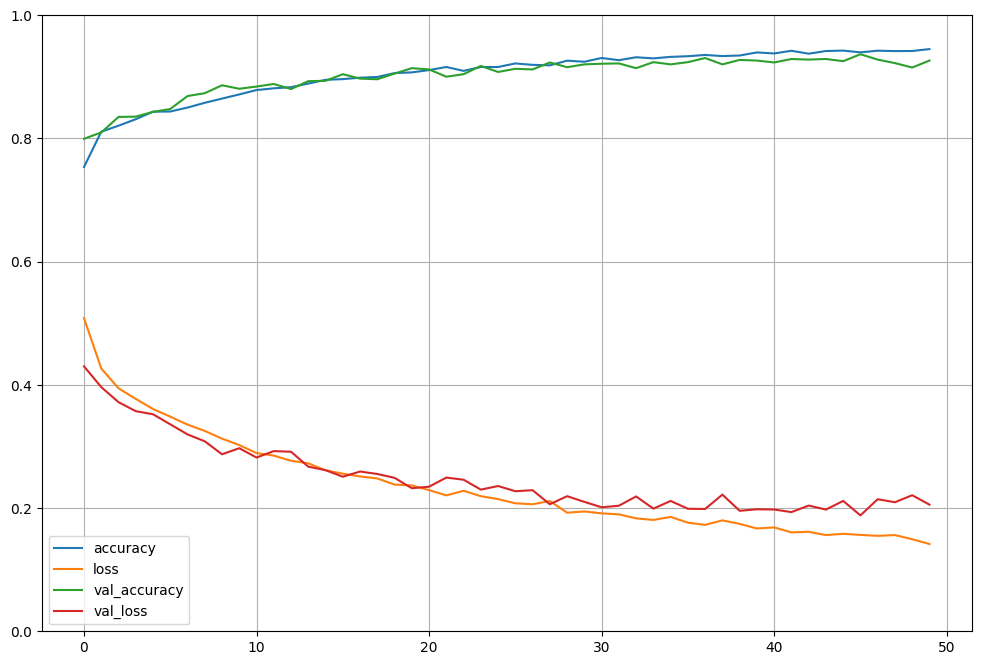

-----------------------------------------------------------------------
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9265 - loss: 0.2056
Loss                       :  0.20558792352676392
Accuracy                   :  0.9264781475067139


In [13]:
# Plot the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model with processed data
model_evaluate = model.evaluate(X_test_processed, y_test_cat, verbose=1)
print("Loss                       : ", model_evaluate[0])
print("Accuracy                   : ", model_evaluate[1])

In [14]:
y_pred = model.predict(X_test_processed)
y_pred[0].argmax(axis=-1)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


np.int64(1)

In [15]:
y_pred_probs = model.predict(X_test_processed)
y_pred = np.argmax(y_pred_probs, axis=1) # اختيار الفئة ذات الاحتمالية الأعلى
print("\nClassification Report:\n", classification_report(y_test, y_pred))

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       973
           1       0.88      0.99      0.93       972

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification report:
               precision    recall  f1-score   support

   No Stroke       0.99      0.86      0.92       973
      Stroke       0.88      0.99      0.93       972

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945


Confusion matrix:


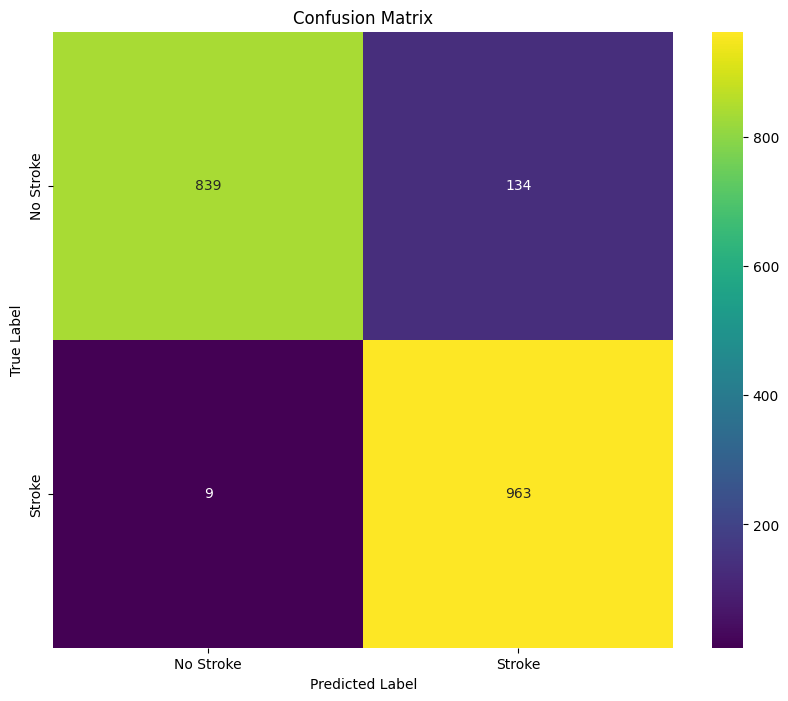


Normalized confusion matrix:


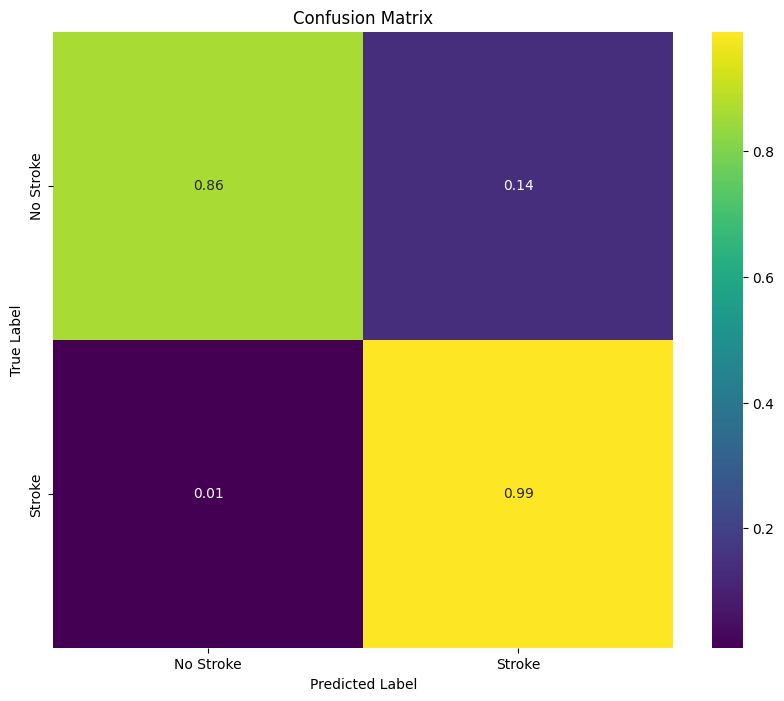

In [16]:
# Get predictions
y_pred_probs = model.predict(X_test_processed)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Since this is binary classification, adjust class names
class_names = ["No Stroke", "Stroke"]  # Changed to meaningful class names

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report:\n", classification_report(y_test, y_pred, target_names=class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
    # Compute confusion matrix
    conf_matx = confusion_matrix(true, preds, normalize=normalize)
    conf_matx = np.round(conf_matx, 2)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matx, 
                annot=True, 
                fmt=".2f" if normalize else "g",
                cmap="viridis",
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

print("\nConfusion matrix:")
draw_confusion_matrix(y_test, y_pred)

print("\nNormalized confusion matrix:")
draw_confusion_matrix(y_test, y_pred, "true")